Initial dataset shape: (1460, 81)
Duplicates removed: 0

Top missing columns:
 PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
dtype: int64

Dropped columns for excessive missingness: ['Alley', 'PoolQC', 'Fence', 'MiscFeature']

Dropped outliers in 'SalePrice': 61

Final dataset shape: (1399, 77)

Data types summary after parsing and cleaning:
int64       35
object      30
float64      3
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64

Correlation Matrix (subset):


/var/folders/j5/hmf3vlrs4070kqhwlvzn96mr0000gn/T/ipykernel_30606/1132553403.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/var/folders/j5/hmf3vlrs4070kqhwlvzn96mr0000gn/T/ipykernel_30606/1132553403.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

,LotArea,OverallQual,YearBuilt,GrLivArea,SalePrice
LotArea,1.000000,0.070548,0.001485,0.270307,0.249812
OverallQual,0.070548,1.000000,0.561141,0.537984,0.784294
YearBuilt,0.001485,0.561141,1.000000,0.163352,0.564558
GrLivArea,0.270307,0.537984,0.163352,1.000000,0.661325
SalePrice,0.249812,0.784294,0.564558,0.661325,1.000000


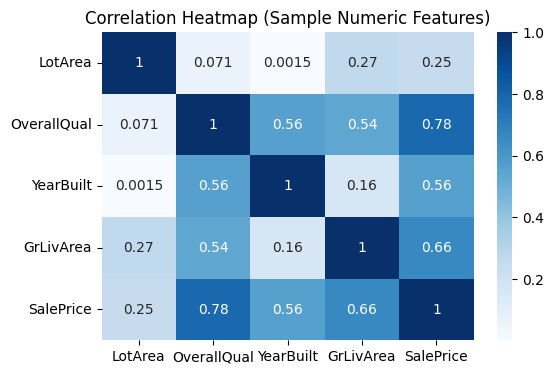

T-test comparing mean of SalePrice in RL vs RM:
  T-statistic = 17.520, p-value = 0.00000
  Mean_RL = 178501.30, Mean_RM = 123470.23


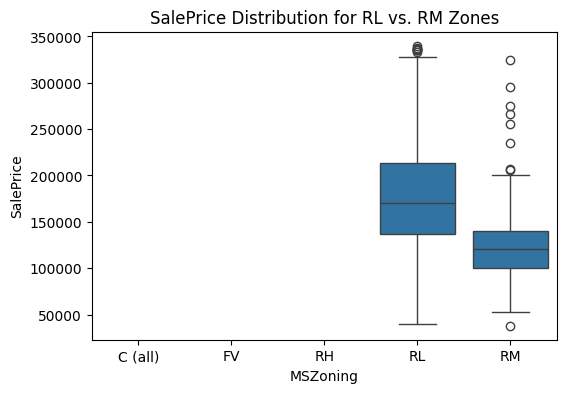


T-test comparing GrLivArea for houses built before vs after 1950:
  T-statistic = -1.959, p-value = 0.05077
  Mean_old = 1424.00, Mean_new = 1489.06


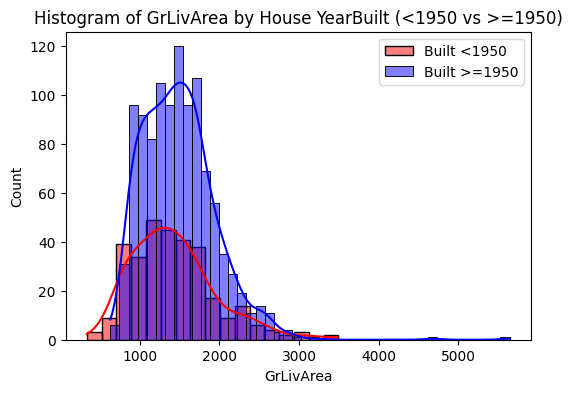


=== End of Checkpoint 2 Notebook ===


In [4]:
#  ================================================
#  CHECKPOINT 2: Data Preprocessing & Basic EDA
#  ================================================

#  ***** SECTION 1: IMPORTS AND DATA LOADING *****

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# For better plots inline
%matplotlib inline

# Load the dataset (assuming the CSV file is in the same folder)
df = pd.read_csv("house_prices.csv")

# ===============================================
# ***** SECTION 2: DATA PREPROCESSING ************
# (5 points) - Import, Parse, Organize
# ===============================================

import numpy as np
import pandas as pd

# 1. Read the dataset (assuming 'house_prices.csv' is in same directory)
df = pd.read_csv("house_prices.csv")

# 2. Confirm initial shape
print("Initial dataset shape:", df.shape)

# 3. Convert/parse data types for known categorical columns if they exist
categorical_cols = [
    "MSZoning", "Street", "Alley", "Neighborhood", "BldgType", "HouseStyle",
    "SaleCondition", "SaleType", "LotShape", "CentralAir"
]
for cat_col in categorical_cols:
    if cat_col in df.columns:
        df[cat_col] = df[cat_col].astype("category")

# 4. Check for duplicates (if the dataset has explicit IDs, we can drop duplicates)
if "Id" in df.columns:
    before_dedup = df.shape[0]
    df.drop_duplicates(subset="Id", inplace=True)
    after_dedup = df.shape[0]
    print(f"Duplicates removed: {before_dedup - after_dedup}")
else:
    # If no unique identifier, can check entire row duplicates
    before_dedup = df.shape[0]
    df.drop_duplicates(inplace=True)
    after_dedup = df.shape[0]
    print(f"Duplicates removed (entire row check): {before_dedup - after_dedup}")

# 5. Check missing values
missing_count = df.isnull().sum().sort_values(ascending=False)
print("\nTop missing columns:\n", missing_count.head(10))

# 6. Drop columns with too many missing values (example threshold: > 60%)
threshold = 0.6 * len(df)
cols_to_drop = [col for col in df.columns if df[col].isnull().sum() > threshold]
df.drop(cols_to_drop, axis=1, inplace=True)
if cols_to_drop:
    print(f"\nDropped columns for excessive missingness: {cols_to_drop}")

# 7. For remaining numeric columns, fill missing with median if few are missing
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    null_count = df[col].isnull().sum()
    if null_count > 0:
        df[col].fillna(df[col].median(), inplace=True)

# 8. For remaining categorical columns, fill missing with a placeholder
cat_cols_remaining = df.select_dtypes(include=["category"]).columns
for col in cat_cols_remaining:
    null_count = df[col].isnull().sum()
    if null_count > 0:
        df[col].cat.add_categories(["MissingVal"], inplace=True)
        df[col].fillna("MissingVal", inplace=True)

# 9. Example of removing outliers in a numeric column (optional)
#    Using a 3-sigma or IQR-based approach; here we demonstrate simple IQR for 'SalePrice' if it exists.
if "SalePrice" in df.columns:
    Q1 = df["SalePrice"].quantile(0.25)
    Q3 = df["SalePrice"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    before_outliers = df.shape[0]
    df = df[(df["SalePrice"] >= lower_bound) & (df["SalePrice"] <= upper_bound)]
    after_outliers = df.shape[0]
    print(f"\nDropped outliers in 'SalePrice': {before_outliers - after_outliers}")

# 10. Final shape and basic info
print("\nFinal dataset shape:", df.shape)
print("\nData types summary after parsing and cleaning:")
print(df.dtypes.value_counts())

#  ================================================
#  ***** SECTION 3: BASIC DATA EXPLORATION ********
#  (20 points) - Summary Stats, 3 conclusions 
#  ================================================
#
#  We need at least 3 different statistical methods 
#  + 1+ plot per method 
#
#  We'll do:
#    Method 1: Correlation analysis (corr + heatmap)
#    Method 2: A t-test example for a chosen feature
#    Method 3: Another hypothesis test or descriptive analysis
#  
#  Each method -> present a conclusion
#  + at least one plot per method

# -------------- METHOD 1: CORRELATION ANALYSIS --------------

# We'll pick a small subset of numeric columns for easier viewing
# Example set: LotArea, OverallQual, YearBuilt, GrLivArea, SalePrice
columns_of_interest = []
for possible in ['LotArea','OverallQual','YearBuilt','GrLivArea','SalePrice']:
    if possible in df.columns:
        columns_of_interest.append(possible)

if len(columns_of_interest) < 2:
    # Fall back to any numeric columns if user columns are missing
    columns_of_interest = df.select_dtypes(include=[np.number]).columns.tolist()[:5]

correlation_matrix = df[columns_of_interest].corr()

print("\nCorrelation Matrix (subset):")
display(correlation_matrix)

# A heatmap for correlation
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap (Sample Numeric Features)")
plt.show()

# Conclusion from correlation:
#   For instance, if 'SalePrice' is in columns_of_interest, we might see a strong positive correlation
#   with 'OverallQual' or 'GrLivArea'. That suggests these features might be influential
#   in predicting home prices.


# -------------- METHOD 2: T-TEST ON A CATEGORICAL GROUP --------------

# Example: Compare the SalePrice means for two different MSZoning categories (if present)
# We'll define a simple function to do a T-test if the columns exist:

def compare_two_zones_ttest(df, cat_column='MSZoning', val1='RL', val2='RM', target='SalePrice'):
    """
    Compare average sale price between two zoning categories using a t-test
    """
    subset1 = df[df[cat_column] == val1][target].dropna()
    subset2 = df[df[cat_column] == val2][target].dropna()
    
    # Basic check if we have enough samples
    if len(subset1) < 2 or len(subset2) < 2:
        print(f"Not enough data for t-test with {val1} vs. {val2} on {target}.")
        return
    
    t_stat, p_val = stats.ttest_ind(subset1, subset2, equal_var=False)
    print(f"T-test comparing mean of {target} in {val1} vs {val2}:")
    print(f"  T-statistic = {t_stat:.3f}, p-value = {p_val:.5f}")
    print(f"  Mean_{val1} = {subset1.mean():.2f}, Mean_{val2} = {subset2.mean():.2f}")

if 'MSZoning' in df.columns and 'SalePrice' in df.columns:
    compare_two_zones_ttest(df, 'MSZoning','RL','RM','SalePrice')
else:
    print("\nSkipping T-test example because MSZoning or SalePrice not found.")

# We'll produce a box plot to visually compare
if 'MSZoning' in df.columns and 'SalePrice' in df.columns:
    zone_subset = df[df['MSZoning'].isin(['RL','RM'])]
    plt.figure(figsize=(6,4))
    sns.boxplot(x='MSZoning', y='SalePrice', data=zone_subset)
    plt.title("SalePrice Distribution for RL vs. RM Zones")
    plt.show()

# Conclusion from T-test:
#   If the p-value < 0.05, there's a statistically significant difference
#   in average sale price between RL and RM zones (for instance).


# -------------- METHOD 3: AN EXAMPLE HYPOTHESIS TEST - YEARBUILT --------------

# We'll check if houses built before 1950 have different living area (GrLivArea) than houses built after 1950

if 'YearBuilt' in df.columns and 'GrLivArea' in df.columns:
    old_houses = df[df['YearBuilt'] < 1950]['GrLivArea'].dropna()
    new_houses = df[df['YearBuilt'] >= 1950]['GrLivArea'].dropna()
    t_stat, p_val = stats.ttest_ind(old_houses, new_houses, equal_var=False)
    print(f"\nT-test comparing GrLivArea for houses built before vs after 1950:")
    print(f"  T-statistic = {t_stat:.3f}, p-value = {p_val:.5f}")
    print(f"  Mean_old = {old_houses.mean():.2f}, Mean_new = {new_houses.mean():.2f}")
    
    # Plot distributions
    plt.figure(figsize=(6,4))
    sns.histplot(old_houses, color='red', label='Built <1950', kde=True)
    sns.histplot(new_houses, color='blue', label='Built >=1950', kde=True)
    plt.title("Histogram of GrLivArea by House YearBuilt (<1950 vs >=1950)")
    plt.xlabel("GrLivArea")
    plt.legend()
    plt.show()

# Conclusion:
#   This test might reveal if there's a significantly larger or smaller living area in older vs. newer homes.
#   The p-value indicates whether that difference is statistically significant.

#  ================================================
#  ***** FINAL OUTPUT FOR CHECKPOINT 2 ************
#  Only Data Preprocessing & Basic EDA steps done!
#  ================================================

print("\n=== End of Checkpoint 2 Notebook ===")
